## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.nunique()
print("Number of unique users: {}".format(unique_users))

Number of unique users: 290584


d. The proportion of users converted.

In [5]:
unique_converted_users = df.query('converted == 1').user_id.nunique()
print("Number of unique users who converted: {}".format(unique_converted_users))
print("Proportion of users converted: {}".format(unique_converted_users/unique_users))

Number of unique users who converted: 35173
Proportion of users converted: 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Get boolean index for rows which contain treatment group
treatment_bool = df["group"] == "treatment"

# Get boolean index for rows which contain new_page
new_page_bool = df["landing_page"] == "new_page"

# Count number of times the new_page and treatment don't line up
(treatment_bool != new_page_bool).sum()

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


>Based on the results obtained via df.info(), it can be confirmed that there is no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Get boolean index for rows which contain treatment group
treatment_bool = df["group"] == "treatment"

# Get boolean index for rows which contain new_page
new_page_bool = df["landing_page"] == "new_page"

# Drop rows where treatment is not aligned with new_page
df2 = df.drop(df.index[(treatment_bool != new_page_bool)])

In [9]:
# Get boolean index for rows which contain control group
control_bool = df2["group"] == "control"

# Get boolean index for rows which contain old_page
old_page_bool = df2["landing_page"] == "old_page"

# Drop rows where control is not aligned with old_page
df2 = df2.drop(df2.index[(control_bool != old_page_bool)])

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
unique_users = df2.user_id.nunique()
print("Number of unique users: {}".format(unique_users))

Number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Get duplicated user_id
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# Get row information for repeat user_id
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Drop duplicates except for the first occurrence
df2.drop_duplicates(subset="user_id", inplace=True)

In [15]:
# Double check one of the rows with a duplicate user_id is removed - only one row should be remaining
df2.loc[df2["user_id"] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# Conversion rate regardless of page
prob_converted = df2.converted.mean()
prob_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Conversion rate of the control group
prob_ctrl_converted = df2.query('group == "control"').converted.mean()
prob_ctrl_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# Conversion rate of the treatment group
prob_treat_converted = df2.query('group == "treatment"').converted.mean()
prob_treat_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
# Probability of an individual receiving the new page
prob_new = (df2["landing_page"] == "new_page").mean()
prob_new

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>The probabilities of conversion in the control and treatment groups are 0.1204 and 0.1188 respectively. The probabilty of conversion in the control group is only 0.0016 higher than that in the treatment group. Given that an individual is equally likely to receive either page, the small difference between the conversion rate in the control and treatment groups shows that there is no solid evidence to say that the new treatement page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<center><bold>$H_{0}$ : $p_{new}$ - $p_{old}$ $\leq$ 0</bold></center>
<center><bold>$H_{1}$ : $p_{new}$ - $p_{old}$ $>$ 0</bold></center>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0, 1], n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0, 1], n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# p_new - p_old
new_page_converted.mean() - old_page_converted.mean()

-0.00049047187542961

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
n = 10000 # number of simulations
p_diffs = []

# Simulate p_diff (p_new - p_old) values for n times
for _ in range(n):
    new_page_converted = np.random.choice([0, 1], n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], n_old, p=[1-p_old, p_old])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

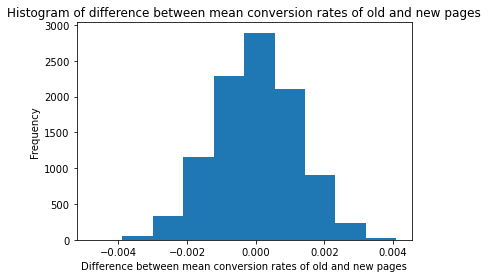

In [28]:
# Plot histogram of p_diffs
plt.hist(p_diffs)
plt.title("Histogram of difference between mean conversion rates of old and new pages")
plt.xlabel("Difference between mean conversion rates of old and new pages")
plt.ylabel("Frequency");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Compute p-value
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(p_diffs > obs_diff).mean()

0.9066

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<ul>
<li>p-value was computed in part j.</li>
<li>The computed p-value (~0.905) is much greater than Type 1 error rate of 0.05. Thus, we fail to reject the null hypothesis. In other words, there is no evidence showing that the new treatment page leads to more conversions.</li>
</ul>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
zscore, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
zscore, pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<ul>
<li>Z-score of 1.3109 produces p-value of 0.9051 for our sample.</li>
<li>The p-value is much greater than Type 1 error rate of 0.05. Thus, we fail to reject the null hypothesis. In other words, there is no evidence showing that the new treatment page leads to more conversions.</li>
<li>The findings in part n. match with the findings in part j. and k.</li>
</ul>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>Since it is classification, logistic regression should be used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# Add intercept column to the data frame
df2['intercept'] = 1

# Add ab_page column, which is 1 when an individual receives the treatment and 0 if control
df2['ab_page'] = (df2['group'] == "treatment").astype('int')

# Verify columns are added correctly
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
# Instantiate logistic regression model
lr = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# Fit the model
results = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
# Print model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        01:38:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<ul>
<li>The p-value associated with ab_page is 0.190.</li>
<li>Null and alternative hypotheses in Part II are determining which page has better performance in terms of conversion rate. In other words, this is a one-tailed test.</li>
<li>Null and alternative hypotheses associated with the regression model are determining whether x variable is statistically significant in helping to predict the response. In contrast to Part II, this is a two-tailed test.</li>
<li>Since the tests are different, the results of these tests will be different.</li>
</ul>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<ul>
<li>Adding more features may help to predict the response more accurately. For example, using area only to predict house price may not be sufficient. Adding the house location into the regression model may help predicting the house price more accurately. This is because the prices may differ in urban areas (more expensive) and rural areas despite the houses having the same area.</li>
<li><b>Disadvantage</b>: If the feature added into the regression model has zero correlation with the responses, then the feature may harm the performance of the regression model. Besides that, adding too many features will lead to the problem of the curse of dimensionality.</li>
</ul>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [35]:
countries_df = pd.read_csv('./countries.csv')

# Merge dataset
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# Print out the first 5 rows of the merged data frames
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
# Compute the unique values of country
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [37]:
# Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new.country)

# Drop CA column
df_new.drop(['CA'], axis=1, inplace=True)

# Verify the operations are performed correctly
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [38]:
# Instantiate logistic regression model
lr = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])

# Fit the model
results = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [39]:
# Print model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        01:38:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

><b>Conclusion:</b> The p-values for UK and US are all more than Type 1 error rate of 0.05. In other words, for each independent variable, we fail to reject the null hypothesis, which states that there is no relationship between that particular independent variable and the response variable. Thus, country does not have a statistically significant impact on the conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
# Instantiate logistic regression model
lr = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])

# Fit the model
results = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [41]:
# Print model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        01:38:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

><b>Conclusion:</b> The p-values for ab_page, UK and US are all more than Type 1 error rate of 0.05. In other words, for each independent variable, we fail to reject the null hypothesis, which states that there is no relationship between that particular independent variable and the response variable. Thus, the type of landing page and country do not have a statistically significant impact on the conversion. <br><br>
After performing A/B test and using regression model to predict conversion, both results show that the new page does not have statistically significant impact on improving the conversion. Furthermore, the results produced by the regression model also show that country does not have an impact on the conversion. Thus, in terms of conversion rate, it is not beneficial for the company to implement the new page based on the available dataset.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.